In [1]:
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import traceback

splitting the image into 4 quarters.

In [2]:
def crop(im,height,width):
    imgwidth, imgheight = im.size
    for i in range(imgheight//height):
        for j in range(imgwidth//width):
            box = (j*width, i*height, (j+1)*width, (i+1)*height)
            yield im.crop(box)

In [3]:
if __name__=='__main__':
    imgdir = '../The-first-assignment-for-IPA/Lab1-Images/Lab1-Images/lena1.png'
    basename = 'img-*.png'
    filelist = glob.glob(os.path.join(imgdir,basename))

In [4]:
img = Image.open(imgdir)
iwidth, iheight = img.size
height = iheight/4
width =  iwidth/4

In [5]:
f = 0
for k, piece in enumerate(crop(img,height,width),f):
    f +=1
    img=Image.new('L', (width,height), 255)
    img.paste(piece)
    path = os.path.join("../The-first-assignment-for-IPA/Results/Splitting/Part%d_1%05d.png" % (int(k+1),f))
    img.save(path)

In [6]:
imageFolderPath = '../The-first-assignment-for-IPA/Results/Splitting/'
imagePath = glob.glob(imageFolderPath+'/*.png') 
im_array = np.array(Image.open(imagePath[0]).convert('L'), 'f')               
im_array = np.expand_dims(im_array, axis=0)                                   

for c in range(1, len(imagePath)):                                               
     im_array_new = np.array(Image.open(imagePath[c]).convert('L'), 'f')       
     im_array_new = np.expand_dims(im_array_new, axis=0)                       
     im_array = np.append(im_array, im_array_new, axis=0) 

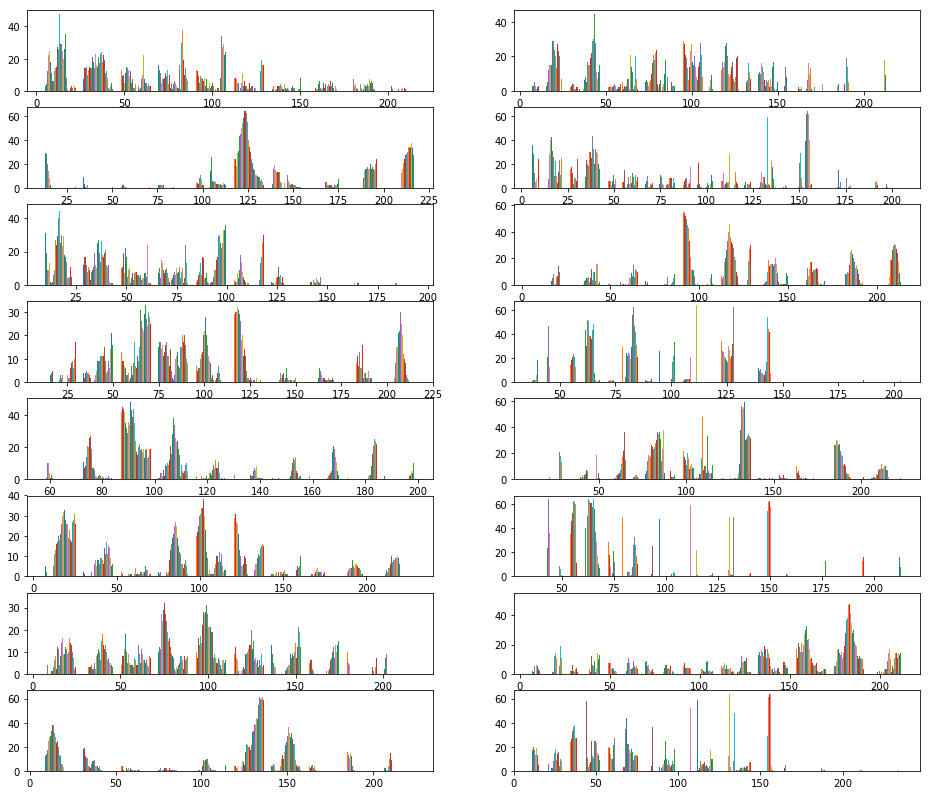

In [7]:
plt.figure(figsize=(16, 14))
for i in xrange(16):
    plt.subplot(8,2,i+1)
    plt.hist(im_array[i])
plt.show()